# Zillow Clustering

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

import wrangle_zillow as wr

## Acquire

In [2]:
df = wr.get_zillow_data()

In [3]:
df

id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      1727539  14297519                    NaN                       NaN   
1      1387261  17052889                    NaN                       NaN   
2        11677  14186244                    NaN                       NaN   
3      2288172  12177905                    NaN                       NaN   
4      1970746  10887214                    1.0                       NaN   
...        ...       ...                    ...                       ...   
77575   673515  11000655                    NaN                       NaN   
77576  2968375  17239384                    NaN                       NaN   
77577  1843709  12773139                    1.0                       NaN   
77578  1187175  12826780                    NaN                       NaN   
77579  2455685  13083743                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0               NaN          3.5         4.0                  NaN   
1               NaN          1.0         2.0                  NaN   
2               NaN          2.0         3.0                  NaN   
3               NaN          3.0         4.0                  NaN   
4               NaN          3.0         3.0                  NaN   
...             ...          ...         ...                  ...   
77575           NaN          2.0         2.0                  NaN   
77576           NaN          2.0         4.0                  NaN   
77577           NaN          1.0         3.0                  NaN   
77578           NaN          2.0         3.0                  NaN   
77579           NaN          2.0         3.0                  NaN   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                        NaN                3.5         NaN   
1                        NaN                1.0         NaN   
2                        NaN                2.0         NaN   
3                        8.0                3.0         NaN   
4                        8.0                3.0         NaN   
...                      ...                ...         ...   
77575                    6.0                2.0         NaN   
77576                    NaN                2.0         NaN   
77577                    4.0                1.0         NaN   
77578                    6.0                2.0         NaN   
77579                    4.0                2.0         NaN   

       finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                           NaN                        3100.0   
1                        1465.0                        1465.0   
2                           NaN                        1243.0   
3                           NaN                        2376.0   
4                           NaN                        1312.0   
...                         ...                           ...   
77575                       NaN                        1286.0   
77576                    1612.0                        1612.0   
77577                       NaN                        1032.0   
77578                       NaN                        1762.0   
77579                       NaN                        1050.0   

       finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                    3100.0                   NaN                   NaN   
1                    1465.0                   NaN                   NaN   
2                    1243.0                   NaN                   NaN   
3                    2376.0                   NaN                   NaN   
4                    1312.0                   NaN                   NaN   
...                     ...                   ...                   ...   
77575                1286.0                   NaN                   NaN   
77576                1612.0                   NaN                   NaN   
77577                1032.0                  

## Prepare

In [4]:
imputer, scaler, train, validate, test = wr.prep_zillow(df)
train

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
30896  0.009697     0.000000    0.000000               0.272727   
19077  0.024845     0.291667    0.333333               0.454545   
49660  0.007067     0.000000    0.000000               0.454545   
66688  0.004009     0.166667    0.333333               0.636364   
36468  0.022685     0.208333    0.333333               0.454545   
...         ...          ...         ...                    ...   
11615  0.013934     0.083333    0.333333               0.454545   
72879  0.021981     0.083333    0.333333               0.454545   
49482  0.022946     0.125000    0.222222               0.454545   
10277  0.022218     0.083333    0.444444               0.454545   
49750  0.012717     0.166667    0.222222               0.545455   

       calculatedbathnbr  calculatedfinishedsquarefeet  fips  fullbathcnt  \
30896           0.000000                      0.039767  6037     0.000000   
19077           0.291667                      0.239289  6059     0.250000   
49660           0.000000                      0.026083  6037     0.000000   
66688           0.166667                      0.111035  6037     0.166667   
36468           0.208333                      0.164853  6059     0.166667   
...                  ...                           ...   ...          ...   
11615           0.083333                      0.045185  6037     0.083333   
72879           0.083333                      0.080819  6059     0.083333   
49482           0.125000                      0.071497  6059     0.083333   
10277           0.083333                      0.085457  6059     0.083333   
49750           0.166667                      0.099555  6037     0.166667   

       latitude  longitude  lotsizesquarefeet propertycountylandusecode  \
30896  0.429497   0.640936           0.001013                      0100   
19077  0.198432   0.956228           0.000999                       122   
49660  0.478220   0.638716           0.000827                      010G   
66688  0.889704   0.636147           0.001319                      0100   
36468  0.379497   0.868787           0.001489                         1   
...         ...        ...                ...                       ...   
11615  0.448328   0.794530           0.000819                      0100   
72879  0.217434   0.793767           0.000940                       122   
49482  0.346911   0.902485           0.000798                       122   
10277  0.296044   0.749679           0.000942                       122   
49750  0.271011   0.611398           0.000755                      0100   

       rawcensustractandblock regionidcity regionidcounty regionidzip  \
30896                0.005844       396053           3101       95982   
19077                0.296733        12773           1286       96996   
49660                0.001437        12447           3101       95994   
66688                0.010826         5534           3101       97319   
36468                0.296595        21412           1286       97078   
...                       ...          ...            ...         ...   
11615                0.004161        45602           3101       96489   
72879                0.297642        25218           1286       96964   
49482                0.296596        16764           1286       97027   
10277                0.297788        24832           1286       97052   
49750                0.006884        12447           3101       96222   

        roomcnt  unitcnt  yearbuilt  structuretaxvaluedollarcnt  \
30896  0.000000      0.0   0.333333                    0.001567   
19077  0.000000      0.0   0.797101                    0.070274   
49660  0.000000      0.0   0.246377                    0.007507   
66688  0.000000      0.0   0.956522                    0.028482   
36468  0.000000      0.0   0.920290                    0.082015   
...         ...      ...        ...                         ...   
11615  0.000000      0.0   0.5

In [5]:
imputer

KNNImputer(add_indicator=False, copy=True, metric='nan_euclidean',
           missing_values=nan, n_neighbors=5, weights='uniform')

In [6]:
scaler

MinMaxScaler(copy=True, feature_range=(0, 1))

In [7]:
train.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [8]:
validate.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

In [9]:
test.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county        

### Scale data

In [10]:
# # convert some numeric variables that are categorical by nature so that they do not end up scaled
# for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip']:
#     train[col] = train[col].astype('object')

In [11]:
# numeric_columns = train.select_dtypes("number").columns.tolist()
# numeric_columns

In [12]:
# # scale numeric
# scaler = MinMaxScaler()
# scaler.fit(train[numeric_columns])
# train[numeric_columns] = scaler.transform(train[numeric_columns])
# validate[numeric_columns] = scaler.transform(validate[numeric_columns])
# test[numeric_columns] = scaler.transform(test[numeric_columns])

## Explore

#### 1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

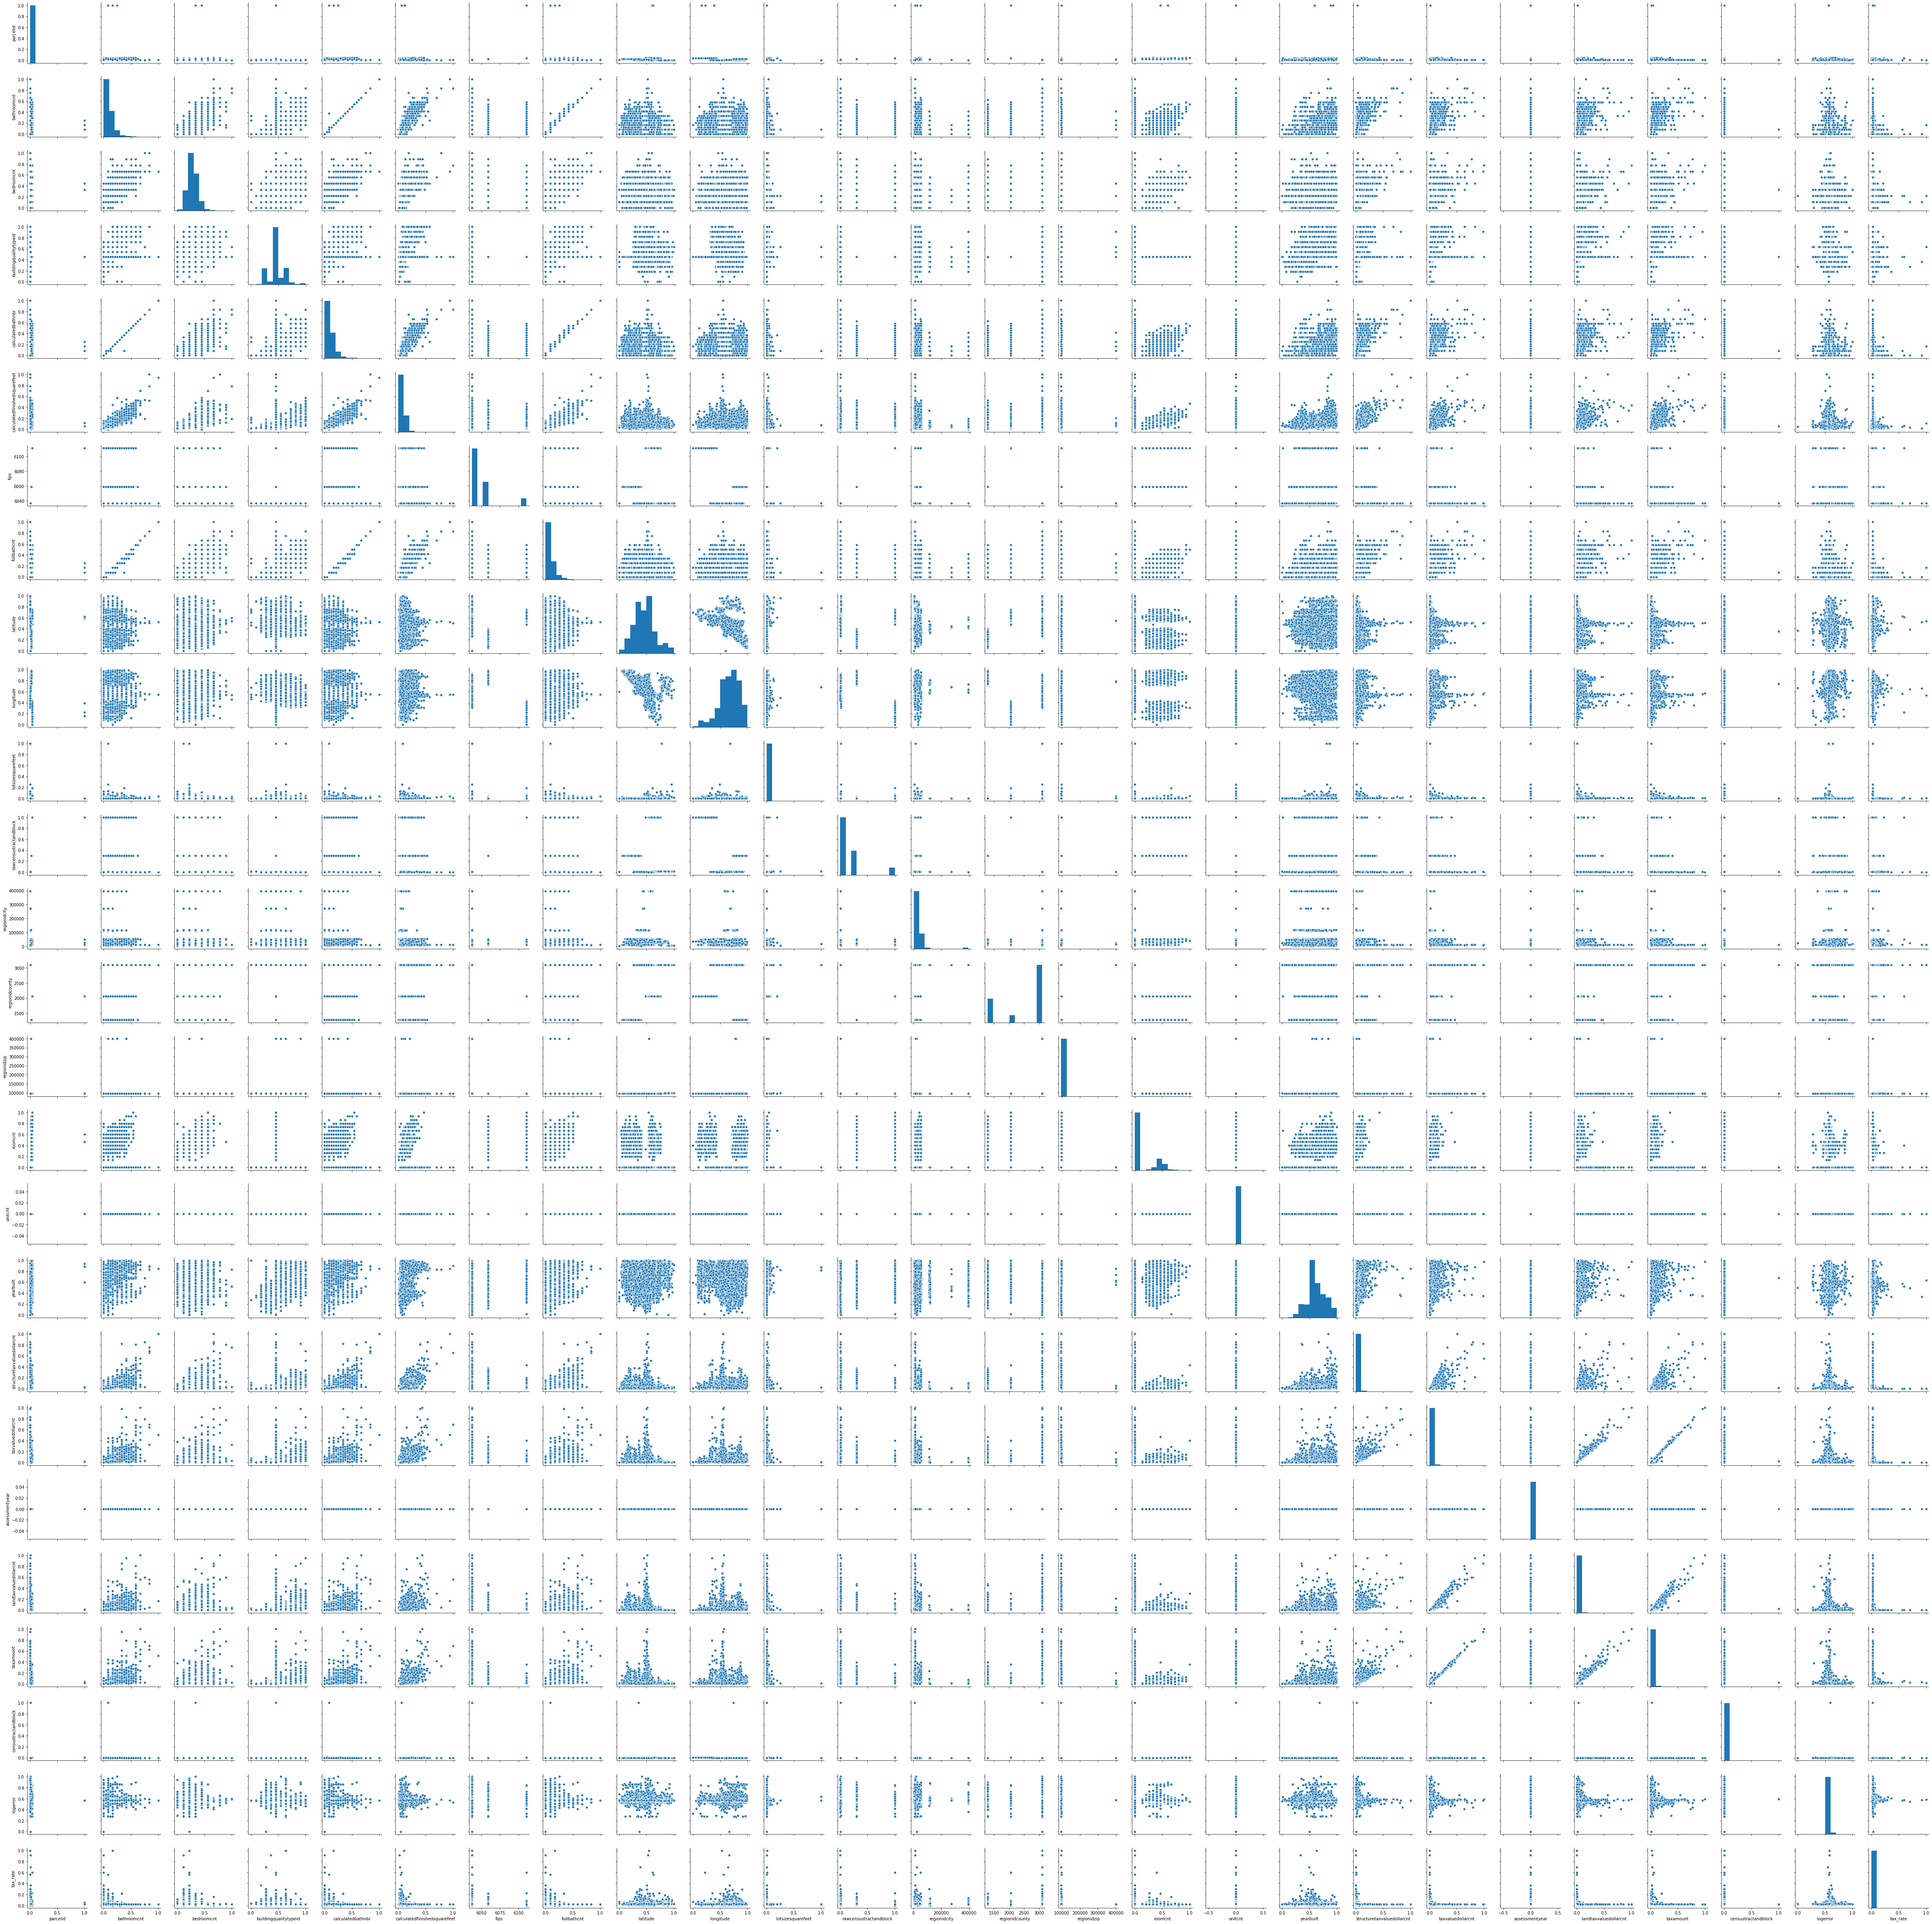

In [13]:
sns.pairplot(train)

#### 2. Plot a correlation matrix heatmap.

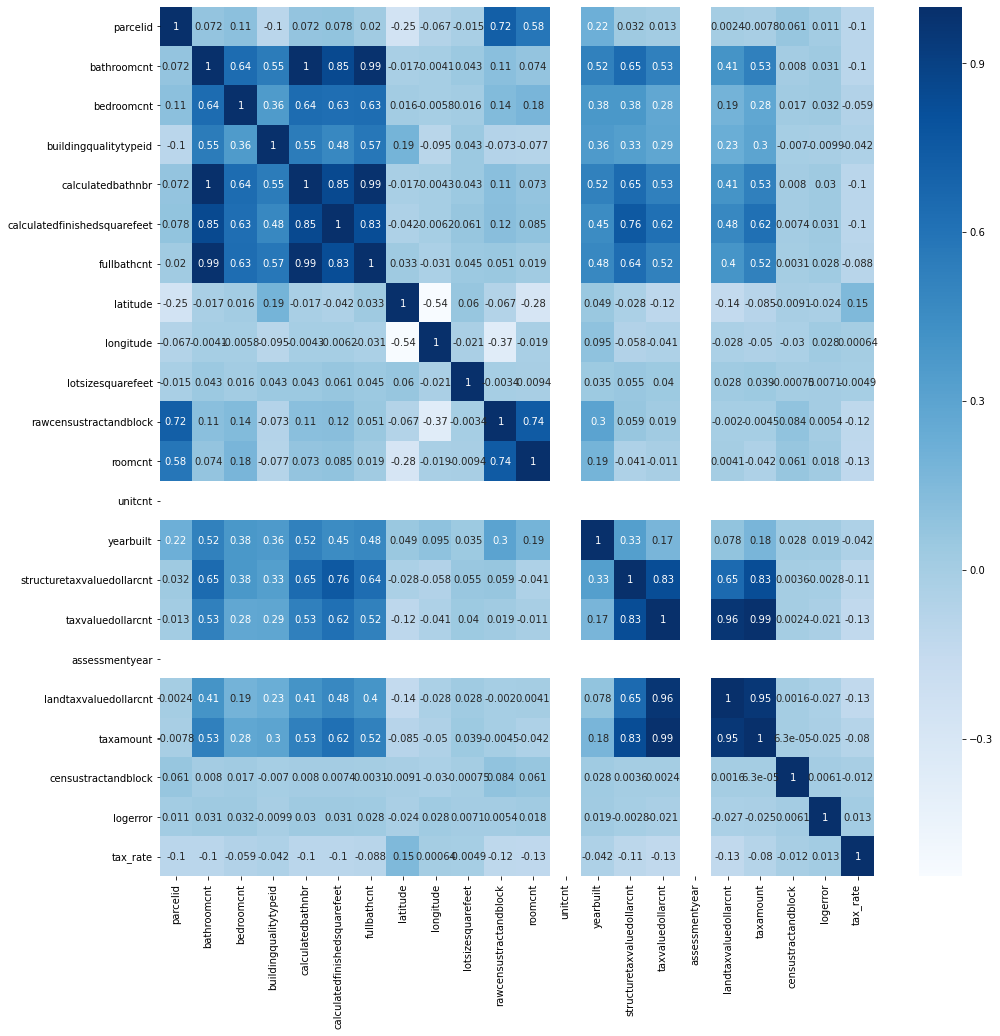

In [14]:
plt.figure(figsize=(16, 16))
sns.heatmap(train.corr(), annot=True, cmap="Blues")
plt.show()

#### 3. Plot latitude against longitude.

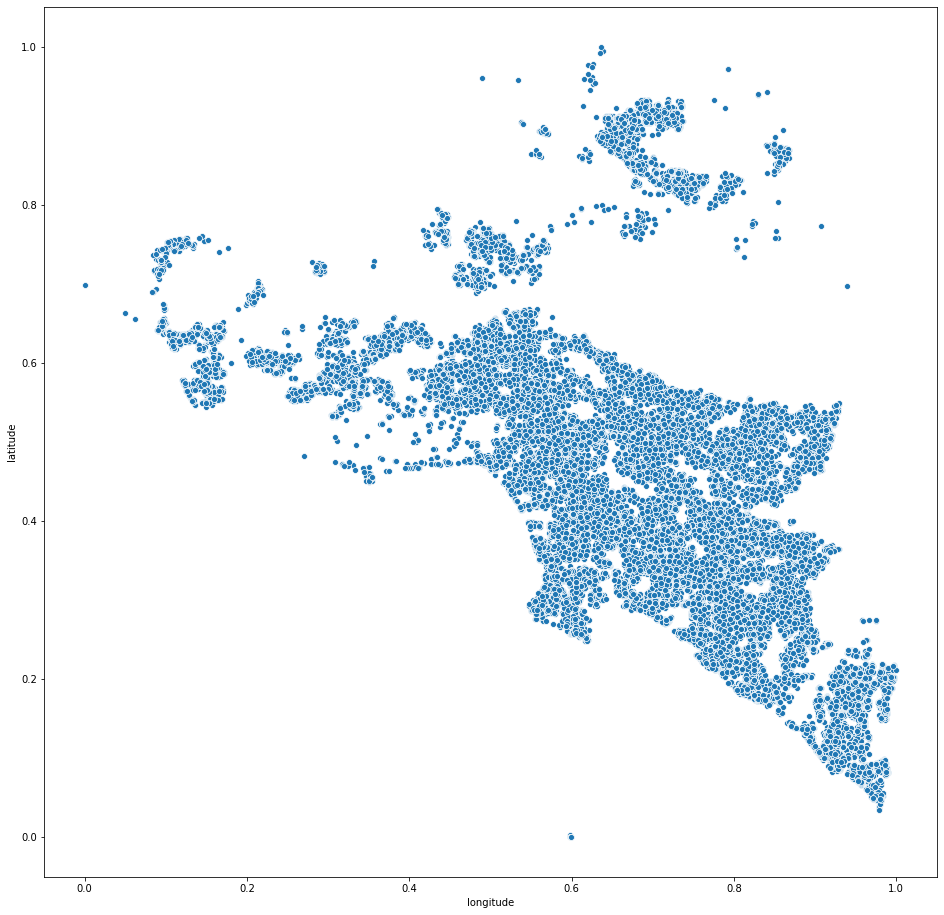

In [15]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=train.longitude, y=train.latitude)
plt.show()

> **Resembles like SoCal! Who woulda guessed?!**

#### 4. Create a useable plot with 4 dimensions, e.g. x, y, color, size.

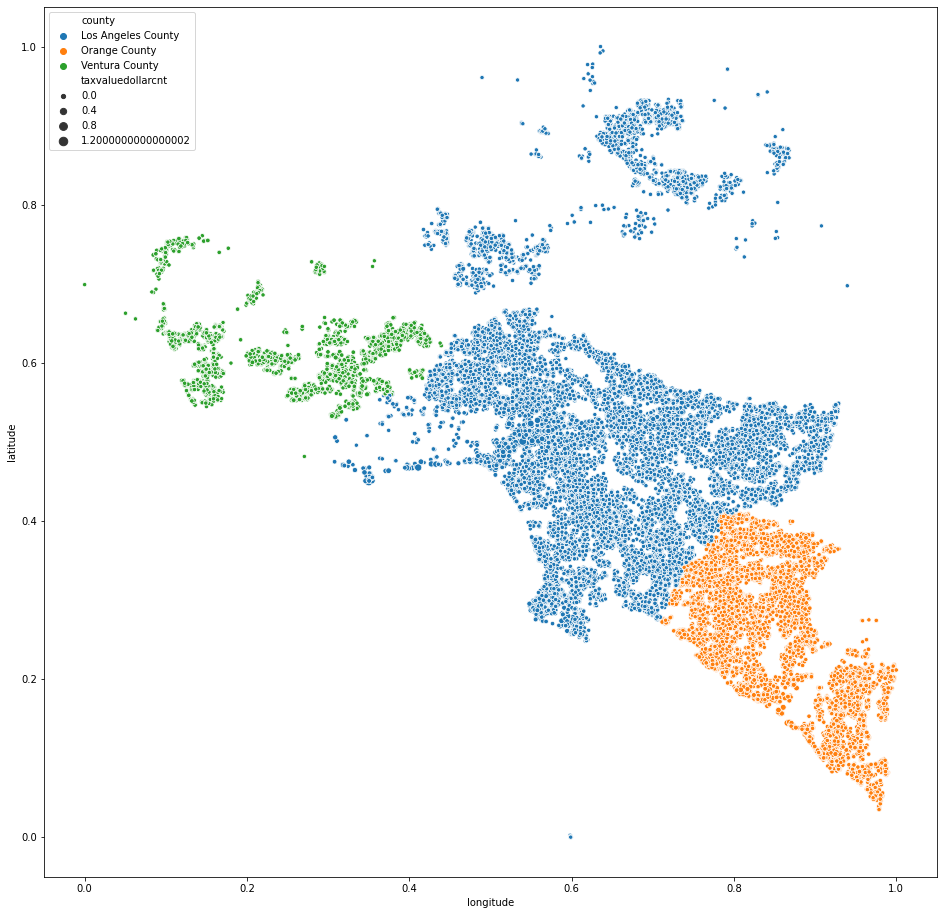

In [16]:
plt.figure(figsize=(16, 16))
sns.scatterplot(x=train.longitude, y=train.latitude, hue=train.county, size=train.taxvaluedollarcnt)
plt.show()

#### 5. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

$H_0$: The mean logerror by zipcode is the same as the population's mean logerror

$H_a$: The mean logerror by zipcode is different than the population's mean logerror

In [17]:
alpha = .001

x = train[train.regionidzip == 96379.0].logerror
mu = train.logerror.mean()

tstat, p = stats.ttest_1samp(x, mu)
print(f"t-statistic = {tstat}")
print(f"    p-value = {p}")
print()
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

t-statistic = 1.3006598568448722
    p-value = 0.19655453738594464

Fail to reject null hypothesis


In [18]:
alpha = .001

mu = train.logerror.mean()

zipcodes_with_significantly_different_logerrors = []

for zipcode in train.regionidzip.unique():
    x = train[train.regionidzip == zipcode].logerror
    tstat, p = stats.ttest_1samp(x, mu)
    if p < alpha:
        print("Reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is different than 
        the population's mean logerror.""")
        print()
        zipcodes_with_significantly_different_logerrors.append(zipcode)
    else:
        print("Fail to reject null hypothesis")
        print(f"""It can be stated with 99.9% certainty that, the mean logerror in zipcode {zipcode} is the same as 
        the population's mean logerror""")
        print()

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95982.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96996.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95994.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97319.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97078.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97328.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96101.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96122.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96962.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96117.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96967.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96378.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96965.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96437.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 95983.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96325.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96436.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96383.0 is the same as 
        the population's mean lo

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96246.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97323.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96125.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96346.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96215.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 97005.0 is the same as 
        the population's mean lo

Reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96045.0 is different than 
        the population's mean logerror.

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96206.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96438.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96037.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96952.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96292.0 is the same as 
        the population's mean logerr

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96119.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96009.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96128.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96207.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96322.0 is the same as 
        the population's mean logerror

Fail to reject null hypothesis
It can be stated with 99.9% certainty that, the mean logerror in zipcode 96151.0 is the same as 
        the population's mean lo

In [19]:
# these are the zipcodes who's logerror is significantly different than the population
zipcodes_with_significantly_different_logerrors

[96007.0, 96045.0, 96280.0, 96943.0, 95989.0]

In [20]:
properties_with_different_logerror = train[train.regionidzip.isin(zipcodes_with_significantly_different_logerrors)]
properties_with_different_logerror

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
36505  0.008036     0.083333    0.222222               0.272727   
23089  0.005889     0.166667    0.333333               0.545455   
2605   0.005853     0.250000    0.222222               0.545455   
56804  0.005559     0.000000    0.222222               0.272727   
69343  0.007684     0.000000    0.333333               0.636364   
...         ...          ...         ...                    ...   
15898  0.005923     0.083333    0.222222               0.636364   
74684  0.005888     0.166667    0.333333               0.636364   
47754  0.005569     0.083333    0.222222               0.454545   
41334  0.007683     0.166667    0.555556               0.454545   
64703  0.005911     0.000000    0.222222               0.454545   

       calculatedbathnbr  calculatedfinishedsquarefeet  fips  fullbathcnt  \
36505           0.083333                      0.079074  6037     0.083333   
23089           0.166667                      0.084125  6037     0.166667   
2605            0.250000                      0.219681  6037     0.250000   
56804           0.000000                      0.045507  6037     0.000000   
69343           0.000000                      0.077008  6037     0.000000   
...                  ...                           ...   ...          ...   
15898           0.083333                      0.063232  6037     0.083333   
74684           0.166667                      0.110989  6037     0.166667   
47754           0.083333                      0.055425  6037     0.083333   
41334           0.166667                      0.149056  6037     0.166667   
64703           0.000000                      0.066217  6037     0.000000   

       latitude  longitude  lotsizesquarefeet propertycountylandusecode  \
36505  0.496261   0.636176           0.001042                      0100   
23089  0.467916   0.556793           0.001152                      0101   
2605   0.474518   0.557373           0.001586                      0101   
56804  0.466928   0.548476           0.000684                      0100   
69343  0.527544   0.683667           0.001159                      0101   
...         ...        ...                ...                       ...   
15898  0.473109   0.543451           0.000936                      0100   
74684  0.470837   0.558830           0.001286                      0101   
47754  0.469125   0.544226           0.000827                      0100   
41334  0.527221   0.685080           0.002736                      0101   
64703  0.476455   0.546576           0.000838                      0100   

       rawcensustractandblock regionidcity regionidcounty regionidzip  \
36505                0.001304        12447           3101       96007   
23089                0.002272        12447           3101       96045   
2605                 0.002276        12447           3101       96045   
56804                0.002308        12447           3101       96045   
69343                0.005135        27183           3101       96280   
...                       ...          ...            ...         ...   
15898                0.002255        12447           3101       96045   
74684                0.002272        12447           3101       96045   
47754                0.002300        12447           3101       96045   
41334                0.005135        27183           3101       96280   
64703                0.002257        12447           3101       96045   

       roomcnt  unitcnt  yearbuilt  structuretaxvaluedollarcnt  \
36505      0.0      0.0   0.210145                    0.013349   
23089      0.0      0.0   0.536232                    0.029964   
2605       0.0      0.0   0.550725                    0.036740   
56804      0.0      0.0   0.507246                    0.018264   
69343      0.0      0.0   0.355072                    0.050872   
...        ...      ...        ...                         ...   
15898      0.0      0.0   0.355072   

#### 6. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

$H_0$: The mean logerror by county is the same

$H_0$: The mean logerror by county is different

In [21]:
alpha = .001

la = train[train.county == "Los Angeles County"].logerror
orange = train[train.county == "Orange County"].logerror
ventura = train[train.county == "Ventura County"].logerror

f, p = stats.f_oneway(la, orange, ventura)
print(f"statistic = {f}")
print(f"  p-value = {p}")
print()
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

statistic = 13.435617795518064
  p-value = 1.4705833166764676e-06

Reject null hypothesis
